## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#starter code did not include numpy as np
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
SingleDataset = pd.merge(mouse_metadata,study_results, how="inner", on="Mouse ID")
# Display the data table for preview
SingleDataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
NumMice = SingleDataset["Mouse ID"].count()
NumMice

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = SingleDataset[SingleDataset.duplicated(['Mouse ID','Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

AllDuplicate = SingleDataset[SingleDataset.duplicated(['Mouse ID'])]
AllDuplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = SingleDataset.drop_duplicates('Mouse ID')
cleanDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
#clean sheet has "249" rows and therefore 249 mice...prior data frame had 1,644 rows


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = SingleDataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = SingleDataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = SingleDataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = SingleDataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = SingleDataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

sumDF = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance,"Stan. Dev": std,"SEM": sem})
sumDF

,Mean,Median,Variance,Stan. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

#need help with "aggregation method, produce the same summary statistics in a single line"


## Bar and Pie Charts

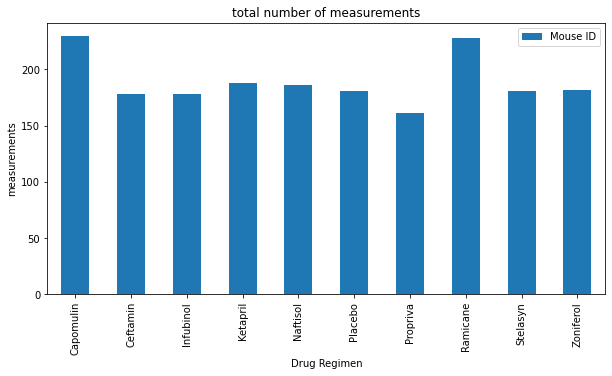

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugData = pd.DataFrame(SingleDataset.groupby(["Drug Regimen"]).count()).reset_index()
drugDF = drugData[["Drug Regimen","Mouse ID"]]
drugDF = drugDF.set_index("Drug Regimen")

#Bar chart
drugDF.plot(kind="bar", figsize=(10,5))

#title
plt.title("total number of measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("measurements")

#show chart
plt.show()   

Text(0, 0.5, 'number')

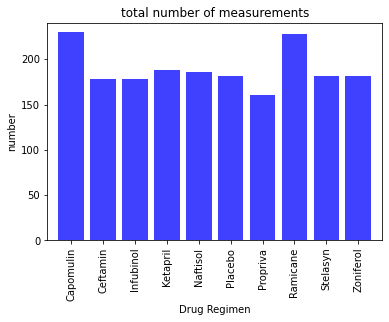

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Create an array with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis 
x_axis = np.arange(len(drugDF))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("total number of measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("number")
 

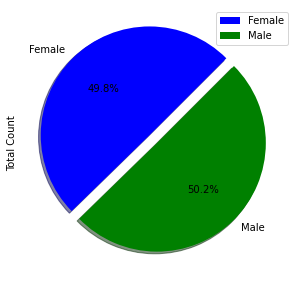

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = SingleDataset.groupby(["Mouse ID","Sex"])
gender

genderDF = pd.DataFrame(gender.size())

#dataframe with Female and Male mice
MouseGender = pd.DataFrame(genderDF.groupby(["Sex"]).count())
MouseGender.columns = ["Total Count"]

#create and format the percentage of female vs male
MouseGender["Percentage of Sex"] = (100*(MouseGender["Total Count"]/MouseGender["Total Count"].sum()))

#format the "Percentage of Sex" column
MouseGender["Percentage of Sex"] = MouseGender["Percentage of Sex"]

#gender_df
MouseGender

#plot 
colors = ['blue', 'green']
explode = (0.10, 0)
plot = MouseGender.plot.pie(y='Total Count',figsize=(10,5), colors = colors, startangle=45, explode = explode, shadow = True, autopct="%1.1f%%")

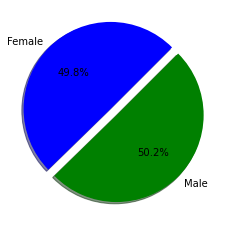

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels 
labels = ["Female","Male"]

#List the values 
sizes = [49.799197,50.200803]

#Create pie 
colors = ['blue', 'green']
explode = (0.10, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
DrugList = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
DrugEval = SingleDataset.loc[SingleDataset['Drug Regimen'].isin(DrugList)]

# Start by getting the last (greatest) timepoint for each mouse
TumorDF = DrugEval.groupby(DrugEval['Mouse ID']).agg({'Timepoint':['max']})
TumorDF.columns = ['Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
TumorDF = TumorDF.reset_index()
TumorDF = pd.merge(TumorDF, SingleDataset, how="left", on=["Mouse ID", "Timepoint"])
TumorDF



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
DrugList = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
TumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
 # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in DrugList:
    TumorVolDrug = TumorDF['Tumor Volume (mm3)'].loc[TumorDF['Drug Regimen'] == drug]
    
# add subset 
    TumorVol.append(TumorVolDrug)
    
# Determine outliers using upper and lower bounds
    quartiles = TumorVolDrug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

       
    
     

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



<ipython-input-16-eb718181e1f7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(DrugList)


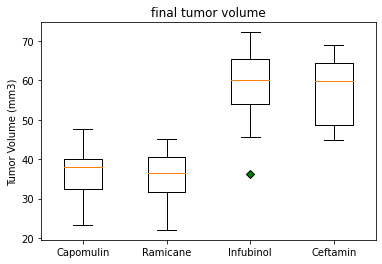

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# format the outliers 
green_diamond = dict(markerfacecolor='g', marker='D')

# plot
fig, ax = plt.subplots()
ax.set_title('final tumor volume')
ax.set_xticklabels(DrugList)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(TumorVol, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'time point')

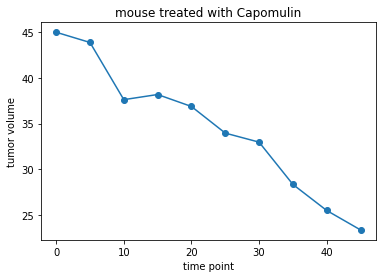

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# mouse
mouse = SingleDataset[['Timepoint', 'Tumor Volume (mm3)']].loc[(SingleDataset['Drug Regimen'] == 'Capomulin') & (SingleDataset['Mouse ID']=='s185')]
mouse

# plot 
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o')
plt.title("mouse treated with Capomulin")
plt.ylabel("tumor volume")
plt.xlabel("time point")

(35.0, 46.0)

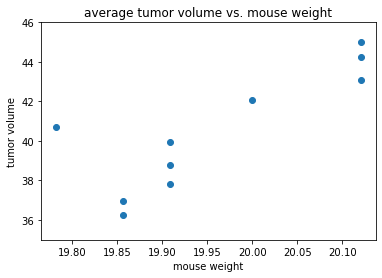

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
AvgTumorVol = SingleDataset.loc[SingleDataset['Drug Regimen'] == 'Capomulin'].groupby(SingleDataset['Timepoint']).agg({'Tumor Volume (mm3)':['mean'], 'Weight (g)':['mean']})
AvgTumorVol.columns = ['Average Tumor Volume {mm3}', 'Average Mouse Weight (g)']

# scatter plot
ATV = AvgTumorVol['Average Tumor Volume {mm3}']
AMW = AvgTumorVol['Average Mouse Weight (g)']
plt.scatter(AMW,ATV)
plt.title('average tumor volume vs. mouse weight')
plt.xlabel('mouse weight')
plt.ylabel('tumor volume')
plt.ylim(35,46)

## Correlation and Regression

correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.82
linear regression equation is y = 20.29x + -364.52


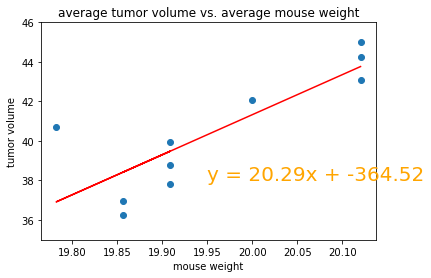

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(ATV,AMW)
print(f'correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}')

# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(AMW,ATV)
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'linear regression equation is {lineEquation}')

# plot line with scatter
ATV = AvgTumorVol['Average Tumor Volume {mm3}']
AMW = AvgTumorVol['Average Mouse Weight (g)']
plt.scatter(AMW,ATV)
plt.title('average tumor volume vs. average mouse weight')
plt.xlabel('mouse weight')
plt.ylabel('tumor volume')
plt.ylim(35,46)

# calculate regression values
values = AMW * slope + intercept
plt.plot(AMW, values, "r-")
plt.annotate(lineEquation,(19.95,38),fontsize=20,color="orange")
plt.show()